In [1]:
#import packages
import pandas as pd
import numpy as np
from datetime import datetime, timedelta
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm 
import scipy.stats as stats
from stargazer.stargazer import Stargazer, LineLocation
import nltk
from nltk.corpus import stopwords
import lemmy

In [2]:
dataset = pd.read_csv("cleandata.csv",index_col="Unnamed: 0")


In [3]:
dateend = datetime(2021,2,4)
dstart = datetime(2020,2,26)
linde_date = datetime.strptime("2020-08-26", "%Y-%m-%d")

In [4]:
dataset['datetime'] = [datetime.strptime(d, "%Y-%m-%d") for d in dataset['datetime']]
dataset['date_clean'] = [datetime.strptime(str(d), "%Y-%m-%d") for d in dataset['date_clean']]
dataset = dataset[dataset['datetime'] > dstart]

Remove the below to prodece the plots for section 3 in paper

In [5]:
dataset = dataset[dataset['n_women'] < 3]
dataset = dataset.reset_index(drop = True)

In [6]:
plt.rcParams.update({'font.size': 12})
plt.rcParams.update({'figure.figsize': (12,8)})


# I begin by making some descriptive stats on the sample that i have 
THis is on the full dataset minus the ones before the startdate. I first remove the ones without faces when i have to do stats on them. This is just to be able to tell a compelling story of the politicians use of Instagram. 

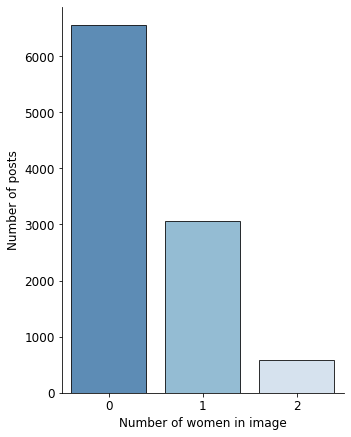

In [7]:
plt.rcParams.update({'font.size': 12})

bars = sns.catplot(x='n_women', kind='count', data=dataset, alpha = 0.8,edgecolor = "black", palette="Blues_r",height=6, aspect=0.8)

#plt.annotate(sum(dataset['bloc']=="r"),(0,5500), ha='center')
#plt.annotate(sum(dataset['bloc']=="b"),(1,5100), ha='center')


plt.xlabel("Number of women in image")
plt.ylabel("Number of posts")
#plt.xticks([0,1],["Rød blok","Blå blok"])
#plt.title("Number of women in image")
plt.xlim(-0.5,2.5)
plt.xticks([0,1,2],[0,1,2])

plt.savefig("plots\women_in_posts_after.png",bbox_inches = "tight")

plt.show()

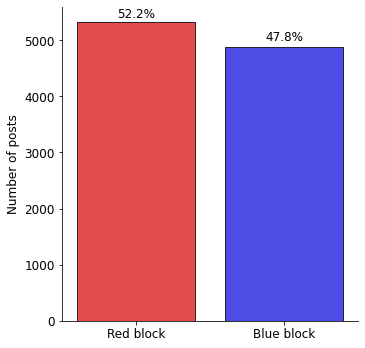

In [8]:
  
bars = sns.catplot(x='bloc', kind='count', data=dataset, palette= ["red","blue"],edgecolor = "black",alpha = 0.8)
plt.annotate(str(round((sum(dataset['bloc']=="r") / len(dataset['sex']) * 100),1))+"%",(0,5400), ha='center')
plt.annotate(str(round((sum(dataset['bloc']=="b") / len(dataset['sex']) * 100),1))+"%",(1,5000), ha='center')
#plt.rcParams['figure.figsize'] = (12,2)


plt.xlabel("")
plt.ylabel("Number of posts")
plt.xticks([0,1],["Red block","Blue block"])
#plt.title("Posts on Instagram")

plt.savefig("plots\\bloc_share_posts.png",bbox_inches = "tight")


plt.show()

In [9]:
mandater = {'Siumut' : 1, 
            'Liberal Alliance' : 3, 
            'Radikale venstre' : 14,
            'Socialdemokratiet' : 49, 
            'Venstre' : 40, 
            'SF' : 15, 
            'Konservative' : 12, 
            'DF': 16, 
            'Løsgænger' : 8,
            'Enhedslisten' : 13, 
            'Nye Borgerlige' : 4, 
            'Javnaðarflokkurin': 1, 
            'Alternativet' : 1,
            'Inuit Ataqatigiit' : 1}


In [10]:
parties = dataset['party'].unique()
n_members = []
for party in parties:
        n_members.append(len(dataset[dataset['party'] == party]['user'].unique()))
        
        
party_users = pd.DataFrame(list(zip(parties, n_members,list(mandater.values()))), 
               columns =["party","users","mandates"]) 



party_list = dataset.groupby(["party"]).agg({"party": ['count']})['party']
party_list['percentage_posts'] = party_list['count'] / party_list['count'].sum() * 100
party_list.reset_index(inplace=True)
parties_df = pd.merge(party_list.sort_values(by = "party"), party_users.sort_values(by = "party"), on = "party")

parties_df['user_percentage'] = parties_df['users'] / parties_df['users'].sum() * 100
parties_df['mandate_percentage'] = parties_df['mandates'] / parties_df['mandates'].sum() * 100

parties_df.sort_values(by = "mandates",ascending=False, inplace=True)
parties_df = parties_df.reset_index(drop = True)


parties_df.loc[len(parties_df.index)] = ['Sambandsflokkurin', 0,0,0,1,0,0]     

parties_df['block'] = ["r","b","b","r","r","r","b","løsgænger","b","b","r","r","r","r","b"]

In [11]:
dataset[dataset['party'] == "Løsgænger"]["name"].unique()

array(['Uffe Elbæk', 'Sikandar Siddique', 'Simon Emil Ammitzbøll Bille',
       'Inger støjberg', 'Susanne Zimmer'], dtype=object)

In [12]:
parties_df

,party,count,percentage_posts,users,mandates,user_percentage,mandate_percentage,block
0,Socialdemokratiet,2290,22.453182,27,49,21.09375,27.528090,r
1,Venstre,2151,21.090303,33,40,25.78125,22.471910,b
2,DF,1222,11.981567,10,16,7.81250,8.988764,b
3,SF,1064,10.432395,13,15,10.15625,8.426966,r
4,Radikale venstre,852,8.353760,12,14,9.37500,7.865169,r
5,Enhedslisten,567,5.559369,7,13,5.46875,7.303371,r
6,Konservative,607,5.951564,10,12,7.81250,6.741573,b
7,Løsgænger,442,4.333758,5,8,3.90625,4.494382,løsgænger
8,Nye Borgerlige,788,7.726248,4,4,3.12500,2.247191,b
9,Liberal Alliance,90,0.882439,3,3,2.34375,1.685393,b


In [13]:
#i add the independets to their bloc - source: https://www.ft.dk/searchResults.aspx?sortedDescending=false&party=1626e331-893b-4130-894a-e0f1726ba5fb
#blues: Simon Emil, Inger Støjberg, Lars Løkke and Orla Østerby
#red: Uffe elbæk, Sikandar siddique, Susanne zimmer 
# I also add jens rohde to red as he was in RV on the 11th of march  as he changed to blue block 
blue = parties_df[parties_df['block'] == "b"]["mandates"].sum() + 4
red = parties_df[parties_df['block'] == "r"]["mandates"].sum() +4

In [14]:
red

99

In [15]:

r_posts = sum(dataset['bloc']=="r")
b_posts = sum(dataset['bloc']=="b")

r_users = len(dataset[dataset['bloc'] == 'r']['user'].unique())
b_users = len(dataset[dataset['bloc'] == 'b']['user'].unique())

r_share = r_posts / (r_posts + b_posts)
b_share = b_posts / (r_posts + b_posts)

r_share_user =  r_users / ( r_users +  b_users)
b_share_user = b_users / (r_users + b_users)

blue_share = blue / 179
red_share = red / 179

In [16]:
pal = sns.color_palette("muted")
print(pal.as_hex())

['#4878d0', '#ee854a', '#6acc64', '#d65f5f', '#956cb4', '#8c613c', '#dc7ec0', '#797979', '#d5bb67', '#82c6e2']


In [17]:
plt.rcParams.update({'font.size': 16})

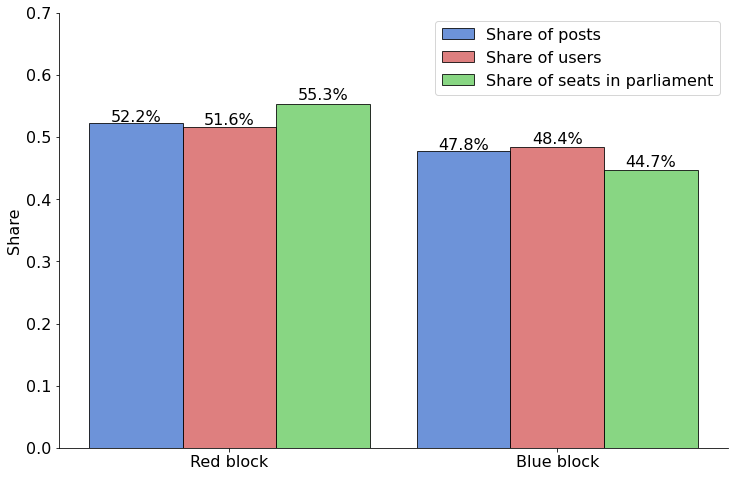

In [18]:
fig, axs = plt.subplots(figsize=(12,8))
#axs.figure(figsize=(12,8))

axs.bar([-0.2,1.2],[r_share,b_share],  0.40, label = "Share of posts", color = "#4878d0",edgecolor = "black", alpha = 0.80)
axs.bar([0.2,1.6],[r_share_user,b_share_user],  0.40, label = "Share of users", edgecolor = "black", color = "#d65f5f", alpha = 0.8)
axs.bar([0.6,2],[red_share,blue_share],  0.40, label = "Share of seats in parliament",edgecolor = "black",color = "#6acc64", alpha = 0.8)





plt.annotate(str(round(r_share,3)*100) + "%",(-0.2,0.525), ha='center')
plt.annotate(str(round(r_share_user,3)*100) + "%",(0.2,0.52), ha='center')
plt.annotate(str(round(red_share*100,1)) + "%",(0.6,0.56), ha='center')

plt.annotate(str(round(b_share,3)*100)+"%",(1.2,0.48), ha='center')
plt.annotate(str(round(b_share_user,3) * 100)+"%",(1.6,0.49), ha='center')
plt.annotate(str(round(blue_share,3) * 100)+"%",(2,0.452), ha='center')


axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)



plt.ylim(0,0.7)
plt.legend()
plt.ylabel("Share")
#plt.xlabel("Party")
#plt.xlim(-0.5,13.5)
plt.xticks([0.2,1.6],["Red block", "Blue block"])
#plt.title("Share of users and posts in each block")
#plt.title("Number of Instagram users compared to Number of seats in parlariment")
plt.savefig("plots\\block_share_share.png",bbox_inches = "tight")
plt.show()

# Gender distribution

In [19]:
plt.rcParams.update({'font.size': 12})


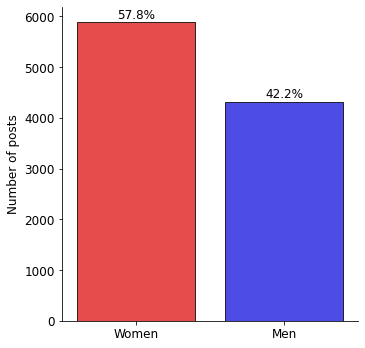

In [20]:
  
bars = sns.catplot(x='sex', kind='count', data=dataset, palette= ["red","blue"],edgecolor = "black",alpha = 0.8)
plt.annotate(str(round((sum(dataset['sex']=="f") / len(dataset['sex']) * 100),2))+"%",(0,5950), ha='center')
plt.annotate(str(round((sum(dataset['sex']=="m") / len(dataset['sex']) * 100),2))+"%",(1,4400), ha='center')

#plt.annotate(sum(dataset['sex']=="f"),(0,5550), ha='center')
#plt.annotate(sum(dataset['sex']=="m"),(1,4000), ha='center')
#plt.rcParams['figure.figsize'] = (12,2)


plt.xlabel("")
plt.ylabel("Number of posts")
plt.xticks([0,1],["Women","Men"])
#plt.title("Posts on Instagram")

plt.savefig("plots\\gender_share.png",bbox_inches = "tight")


plt.show()

### look at the parties

In [21]:
plt.rcParams.update({'font.size': 16})

In [29]:
parties_for_plot = ["Social Democrats",
                    "Liberal Party",
                    "Danish people's party",
                    "Socialist People’s Party",
                    "Social-Liberal Party",
                    "Red-Green Alliance",
                    "Conservative",
                    "Indepedents",
                    "New Right",
                    "Liberal Alliance",
                    "Alternative",
                    "Inuit Ataqatigiit",
                    "Javnaðarflokkurin",
                    "Siumut"]

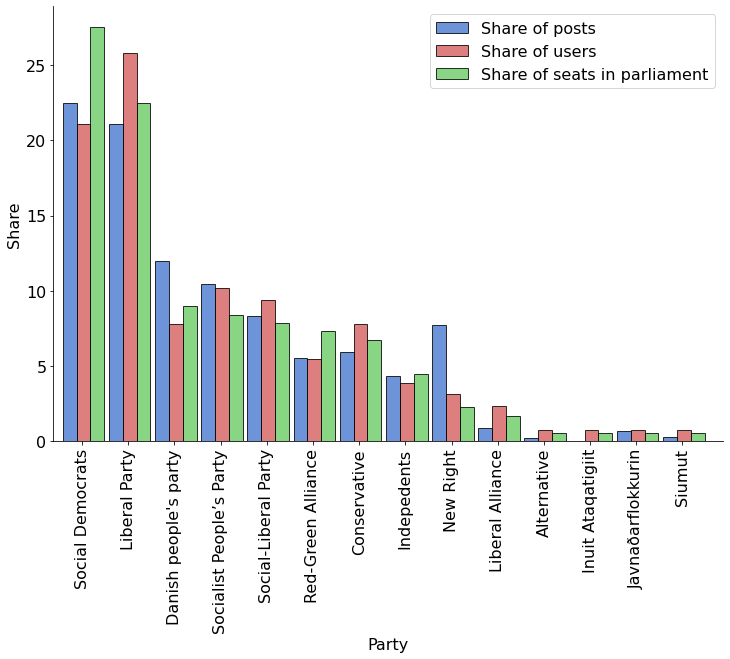

In [30]:
fig, axs = plt.subplots(figsize=(12,8))
#plt.rcParams.update({'font.size': 16})





axs.bar(parties_df.index - 0.15 ,parties_df["percentage_posts"],  0.30, label = "Share of posts",color = "#4878d0",edgecolor = "black", alpha = 0.8)
axs.bar(parties_df.index + 0.15,parties_df["user_percentage"],  0.30, label = "Share of users", color = "#d65f5f", edgecolor = "black",alpha = 0.8)
axs.bar(parties_df.index + 0.45,parties_df["mandate_percentage"], 0.30, label = "Share of seats in parliament",color = "#6acc64",edgecolor = "black", alpha = 0.8)
plt.legend()
plt.ylabel("Share")
plt.xlabel("Party")
plt.xlim(-0.5,14)
#plt.xticks([0.12,1.12,2.12,3.12,4.12,5.12,6.12,7.12,8.12,9.12,10.125,11.12,12.12,13.12],parties_df["party"][0:14], rotation = 90)
plt.xticks([0.12,1.12,2.12,3.12,4.12,5.12,6.12,7.12,8.12,9.12,10.125,11.12,12.12,13.12],parties_for_plot, rotation = 90)

axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)

#plt.title("Number seats and users")

plt.savefig("plots\\share_parties_all3.png",bbox_inches = "tight")
plt.show()

In [407]:
plt.rcParams.update({'font.size': 12})

Group by individual politican to make a plot

In [408]:
user_list = dataset.groupby(["name","bloc"]).agg({"name": ['count']})['name']
user_list = user_list.sort_values(by = "count", ascending=False)
user_list.reset_index(inplace=True)

In [409]:
user_list

,name,bloc,count
0,Pernille Vermund,b,425
1,Pia Kjærsgaard,b,374
2,Mette Frederiksen,r,298
3,liselott blixt,b,270
4,Pia Olsen Dyhr,r,240
...,...,...,...
123,Simon Emil Ammitzbøll Bille,b,4
124,Marie Krarup,b,2
125,Kirsten Normann Andersen,r,2
126,Rune Lund,r,1


In [410]:
user_list['count'].describe()

count    128.000000
mean      79.679688
std       73.528283
min        1.000000
25%       28.500000
50%       61.500000
75%      112.250000
max      425.000000
Name: count, dtype: float64

# Distribution of superuserness

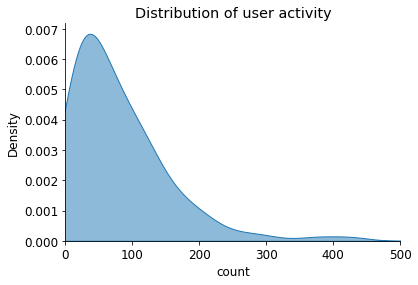

In [411]:

#sns.displot(x="count", hue="bloc",data=user_list, palette = ["b","r"],legend="",bins = 5, alpha = 0.5)
#plt.legend( loc='upper right', labels=['Rød blok', 'Blå blok'])
#plt.savefig("plots\\dist_users_posts1.png")
plt.figure(figsize=(6,4))

sns.kdeplot(x="count", data=user_list, legend="", alpha = 0.5, shade = True)
plt.xlim(0,500)
#plt.legend( loc='upper right', labels=['Red block', 'Blue block'])
sns.despine()
plt.title("Distribution of user activity")
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
plt.savefig("plots\\dist_user_activity.png",bbox_inches = "tight")


plt.show()

In [412]:
ul1 = user_list[user_list['count']<167]
ul_10per = user_list[user_list['count']>167]
ul_sup = user_list[user_list['count']>211]

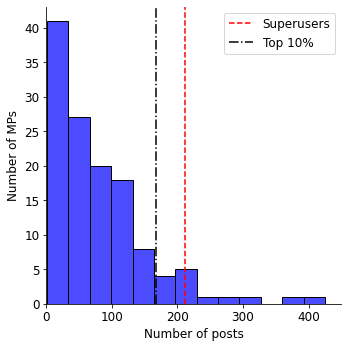

In [413]:

#sns.displot(x="count", hue="bloc",data=user_list, palette = ["b","r"],legend="",bins = 5, alpha = 0.5)
#plt.legend( loc='upper right', labels=['Rød blok', 'Blå blok'])
#plt.savefig("plots\\dist_users_posts1.png")
#plt.figure(figsize=(6,4))
sns.displot(x= "count", data=user_list, color = "blue", alpha = 0.7)

#plt.hist(ul1['count'], bins=10, histtype='step',color = "blue",)
#plt.hist(ul_10per['count'], bins=7, histtype='step',hatch='-',edgecolor='k')
#plt.hist(ul_sup['count'], bins=2, histtype='step',hatch='/', edgecolor='k')

plt.xlim(0,450)
#plt.legend( loc='upper right', labels=['Red block', 'Blue block'])
sns.despine()
#plt.title("Distribution of user activity")
plt.xlabel("Number of posts")
plt.ylabel("Number of MPs")
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
plt.axvline(x = 211, color = 'red', label = "Superusers", linestyle = "--") 
plt.axvline(x = 167, color = 'black', label = "Top 10%", linestyle = "-.") 

plt.legend()
plt.savefig("plots\\dist_user_activity.png",bbox_inches = "tight")
#plt.xlabel("Number of posts in the period")
plt.show()

look at top 30

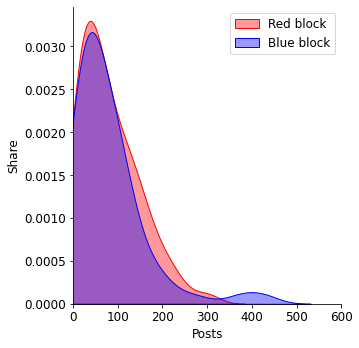

In [414]:

#sns.displot(x="count", hue="bloc",data=user_list, palette = ["b","r"],legend="",bins = 5, alpha = 0.5)
#plt.legend( loc='upper right', labels=['Rød blok', 'Blå blok'])
#plt.savefig("plots\\dist_users_posts1.png")
#plt.figure(figsize=(12,8))

sns.displot(x="count", hue="bloc",data=user_list,kind = "kde", palette = ["b","r"],legend="", alpha = 0.4, fill = True)
plt.xlim(0,600)
plt.legend( loc='upper right', labels=['Red block', 'Blue block'])
sns.despine()
#plt.title("Distribution of user activity in blocks")
plt.ylabel("Share")
plt.xlabel("Posts")

axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
plt.savefig("plots\\dist_users_posts2.png",bbox_inches = "tight")


plt.show()



In [415]:
user_list = user_list.head(10)

In [416]:
user_list['name']

0       Pernille Vermund
1         Pia Kjærsgaard
2      Mette Frederiksen
3         liselott blixt
4         Pia Olsen Dyhr
5    sofiecarstennielsen
6            Astrid Krag
7          Mette Thiesen
8         Susanne Zimmer
9            Ste?n Knuth
Name: name, dtype: object

In [417]:
names = ["Pernille Vermund", 
         "Pia Kjærsgaard", 
         "Mette Frederiksen", 
         "Liselott Blixt", 
         "Pia Olsen Dyhr", 
         "Sofie C. Nielsen",
         "Astrid Krag",
         "Mette Thiesen",
         "Susanne Zimmer",
         "Stén Knuth"]

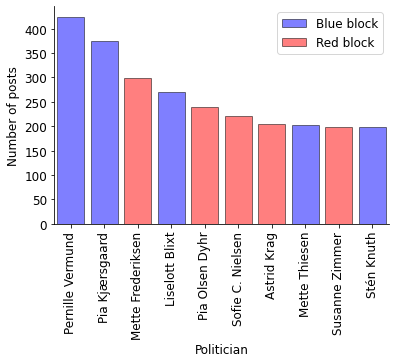

In [418]:
fig, axs = plt.subplots(figsize=(6,4))
#plt.bar(user_list['name'], user_list['count'], color = user_list['bloc'], alpha = 0.8 )
for n,name in enumerate(user_list['name']):
    if user_list.loc[user_list['name'] == name,'bloc'][n] == "b":
        plot_b = axs.bar(name,user_list.loc[user_list['name'] == name,'count'],  color = "b", alpha = 0.5, edgecolor = "black",label = "Blue block")
    else:
        plot_r = axs.bar(name,user_list.loc[user_list['name'] == name,'count'],  color = "r", alpha = 0.5,edgecolor = "black", label = "Red block")

#plt.bar(user_list.loc[user_list['bloc'] == "b",'name'] ,user_list.loc[user_list['bloc'] == "b",'count'],  color = "b", alpha = 0.8, label = "Blue block")
#plt.bar(user_list.loc[user_list['bloc'] == "r",'name'] ,user_list.loc[user_list['bloc'] == "r",'count'],  color = "r", alpha = 0.8, label = "Red block")
#plt.title("Top 10 posters on Instagram")
plt.ylabel("Number of posts")
plt.xlabel("Politician")
plt.xlim(-0.5,9.5)
axs.spines['top'].set_visible(False)
axs.spines['right'].set_visible(False)
#sns.barplot(x='name', y = "count",hue = 'bloc', data=user_list, alpha = 0.8) 
plt.legend([plot_b, plot_r],['Blue block', 'Red block'])
plt.xticks([0,1,2,3,4,5,6,7,8,9],names,rotation = 90)
plt.savefig("plots\\10_most.png",bbox_inches = "tight")

plt.show()

look at the dist of the users

In [289]:
dataset['n_women'] = [int(float(w)) for w in dataset['n_women']]
dataset['n_people'] = [int(float(w)) for w in dataset['n_people']]

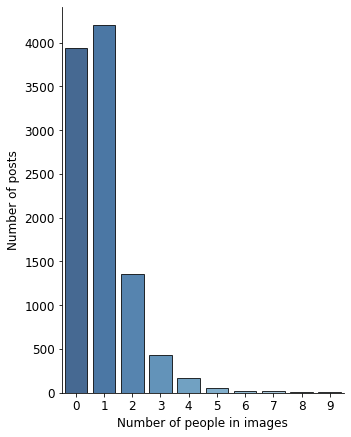

In [290]:
plt.rcParams.update({'font.size': 12})
bars = sns.catplot(x='n_people', kind='count', data=dataset, alpha = 0.8,edgecolor = "black", palette="Blues_r",height=6, aspect=0.8)
#plt.annotate(sum(dataset['bloc']=="r"),(0,5500), ha='center')
#plt.annotate(sum(dataset['bloc']=="b"),(1,5100), ha='center')

#plt.figure(figsize=(12, 8)) 

plt.xlabel("Number of people in images")
plt.ylabel("Number of posts")
#plt.xticks([0,1],["Rød blok","Blå blok"])
#plt.title("number of people in images")
plt.xlim(-0.5,9.5)
plt.xticks([0,1,2,3,4,5,6,7,8,9],[0,1,2,3,4,5,6,7,8,9])

plt.savefig("plots\\people_in_posts.png",bbox_inches = "tight")

plt.show()

In [291]:
#load data where i have not removed all the over 2 women 
dataset_allwomen = pd.read_csv("cleandata.csv",index_col="Unnamed: 0")
dataset_allwomen['datetime'] = [datetime.strptime(d, "%Y-%m-%d") for d in dataset_allwomen['datetime']]
dataset_allwomen['date_clean'] = [datetime.strptime(str(d), "%Y-%m-%d") for d in dataset_allwomen['date_clean']]
dataset_allwomen = dataset_allwomen[dataset_allwomen['datetime'] > dstart]

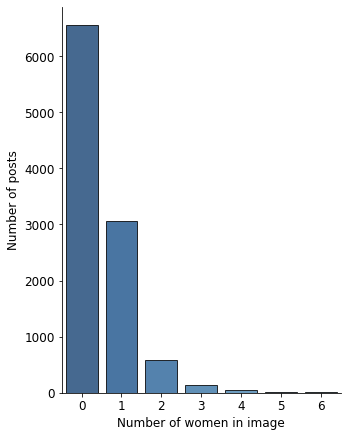

In [292]:
plt.rcParams.update({'font.size': 12})

bars = sns.catplot(x='n_women', kind='count', data=dataset_allwomen, alpha = 0.8,edgecolor = "black", palette="Blues_r",height=6, aspect=0.8)

#plt.annotate(sum(dataset['bloc']=="r"),(0,5500), ha='center')
#plt.annotate(sum(dataset['bloc']=="b"),(1,5100), ha='center')


plt.xlabel("Number of women in image")
plt.ylabel("Number of posts")
#plt.xticks([0,1],["Rød blok","Blå blok"])
#plt.title("Number of women in image")
plt.xlim(-0.5,6.5)
plt.savefig("plots\women_in_posts.png",bbox_inches = "tight")
plt.xticks([0,1,2,3,4,5,6],[0,1,2,3,4,5,6])
plt.show()

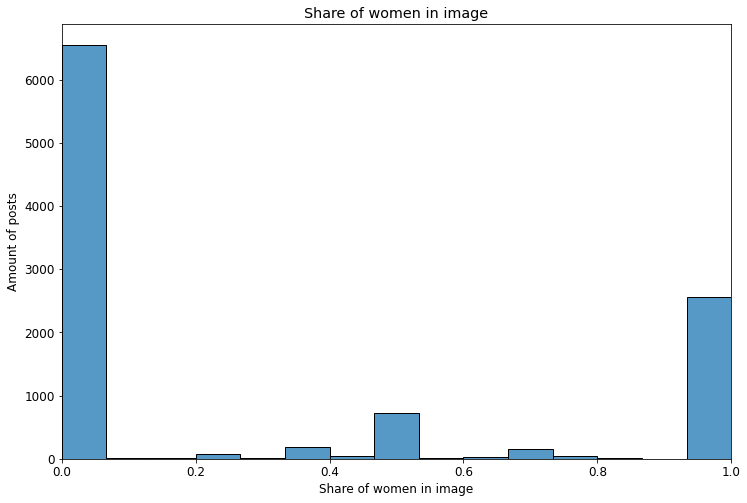

In [24]:
#bars = sns.displot(x='share_women',kind = "kde", data=dataset, alpha = 0.8, palette="muted")
plt.rcParams.update({'font.size': 12})

#plt.annotate(sum(dataset['bloc']=="r"),(0,5500), ha='center')
#plt.annotate(sum(dataset['bloc']=="b"),(1,5100), ha='center')
sns.histplot(dataset['share_women'], kde=False, palette="Blues_r")
#sns.set(rc={'figure.figsize':(12,8)})

#plt.hist( bins = 10)
plt.xlabel("Share of women in image")
plt.ylabel("Number of posts")
#plt.xticks([0,1],["Rød blok","Blå blok"])
plt.title("Share of women in image")
plt.xlim(0,1)
#plt.ylim(0,0.3)

plt.savefig("plots\share_women_in_posts.png",bbox_inches = "tight")

plt.show()

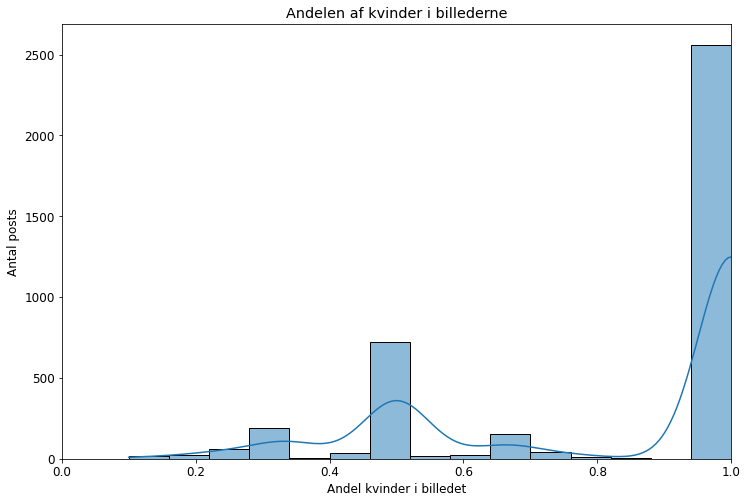

In [25]:
#bars = sns.displot(x='share_women',kind = "kde", data=dataset, alpha = 0.8, palette="muted")

#plt.annotate(sum(dataset['bloc']=="r"),(0,5500), ha='center')
#plt.annotate(sum(dataset['bloc']=="b"),(1,5100), ha='center')
sns.histplot(dataset.loc[dataset['share_women'] > 0, 'share_women'], kde=True)

#plt.hist( bins = 10)
plt.xlabel("Andel kvinder i billedet")
plt.ylabel("Antal posts")
#plt.xticks([0,1],["Rød blok","Blå blok"])
plt.title("Andelen af kvinder i billederne")
plt.xlim(0,1)
#plt.ylim(0,0.3)

plt.savefig("plots\share_women_in_posts_no_zero.png")

plt.show()

In [26]:
plt.rcParams.update({'font.size': 12})

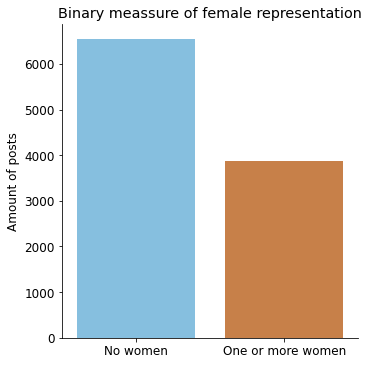

In [27]:
#bars = sns.displot(x='share_women',kind = "kde", data=dataset, alpha = 0.8, palette="muted")

#plt.annotate(sum(dataset['bloc']=="r"),(0,5500), ha='center')
#plt.annotate(sum(dataset['bloc']=="b"),(1,5100), ha='center')
sns.catplot(x='women_binary', kind='count', palette= ["#56B4E9","#D55E00"], data=dataset,alpha = 0.8)
#sns.catplot(x='women_binary', kind='count', data=dataset, palette= ["#F0E442","#CC79A7"],alpha = 0.8)
#sns.catplot(x='men_binary', kind='count', data=dataset, palette= ["red","blue"],alpha = 0.8)

#plt.hist( bins = 10)
plt.xlabel("")
plt.ylabel("Number of posts")
plt.xticks([0,1],["No women","One or more women"])
plt.title("Binary meassure of female representation")
plt.xlim(-0.5,1.5)
#plt.ylim(0,0.3)

plt.savefig("plots\\binary_share_women_in_posts.png",bbox_inches = "tight")

plt.show()

In [28]:


#sns.catplot(x='women_binary', kind='count', data=dataset, palette= ["red","blue"],alpha = 0.8)
#sns.catplot(x='men_binary', kind='count', data=dataset, palette= ["red","blue"],alpha = 0.8)
#plt.bar("At leats on man", sum(men_one), color = "b", alpha = 0.8)
#plt.bar("At leats on woman", sum(women_one), color = "r", alpha = 0.8)

##plt.hist( bins = 10)
#plt.xlabel("Antal posts med mindst én kvinde eller mand")
#plt.ylabel("Antal posts")
#plt.xticks([0,1],["At leats on man","At leats on woman"])
#plt.title("Antal billeder med mindst én kvinde eller man i")
#plt.xlim(-0.5,1.5)
#plt.ylim(0,0.3)

#plt.savefig("plots\\binary_Number_women_in_posts.png")

#plt.show()

# regression til Mads og Josefine - måske også til selv

In [29]:
grouped_daily = dataset.groupby(["datetime","bloc"]).agg({"datetime": ['count']})['datetime']

In [30]:
grouped_daily_no_block = dataset.groupby(["datetime"]).agg({"datetime": ['count']})['datetime']

In [31]:
grouped_daily.reset_index(inplace=True)  
grouped_daily_no_block.reset_index(inplace=True)  

In [32]:
grouped_daily['days'] = pd.factorize(grouped_daily['datetime'])[0]
grouped_daily_no_block['days'] = pd.factorize(grouped_daily_no_block['datetime'])[0]

In [33]:
dataset['days_from_start'] = [(dataset['datetime'][i] - dstart).days for i in range(len(dataset))]

In [34]:
model1 = sm.ols(formula= "count ~ days" , data = grouped_daily_no_block).fit() 
model2 = sm.ols(formula= "count ~ days + np.power(days,2)" , data = grouped_daily_no_block).fit() 
model3 = sm.ols(formula= "count ~ days + np.power(days,2) + np.power(days,3)" , data = grouped_daily_no_block).fit() 
model4 = sm.ols(formula= "count ~ days + np.power(days,2) + np.power(days,3) + np.power(days,4)" , data = grouped_daily_no_block).fit() 
model5 = sm.ols(formula= "count ~ days + bloc" , data = grouped_daily).fit() 
#model3 = sm.ols(formula= "count ~ days * bloc" , data = grouped_daily).fit() 

stargazer = Stargazer([model1,model2,model3,model4, model5])
stargazer.title('Full period')
stargazer

In [35]:
modelekstra = sm.ols(formula= "n_people ~ days_from_start" , data = dataset).fit() 
stargazer = Stargazer([modelekstra])
stargazer.title('Full period')
stargazer

There is a constant Number of posts over the periode as well as a prety contant Number of people 

### Grupperet på dag 

In [36]:
line_x = grouped_daily['datetime']

In [37]:
xs = grouped_daily['days']

In [38]:
 line_y = grouped_daily['days'] * 0.005 + 28.465

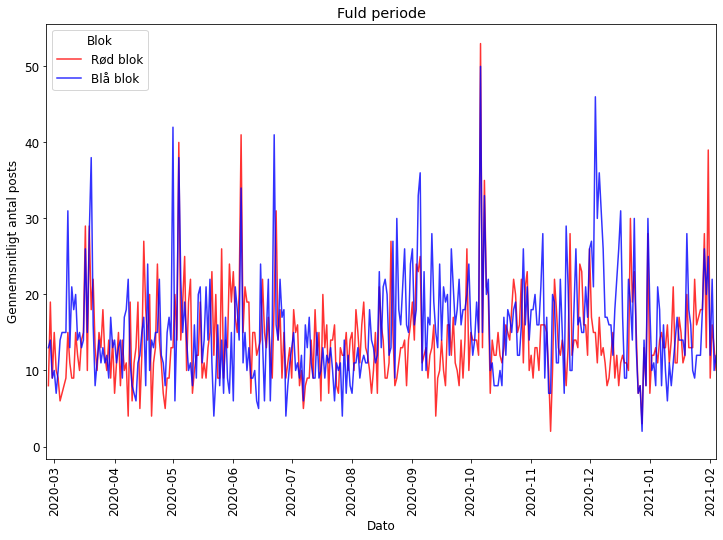

In [39]:
sns.lineplot(x='datetime',y='count',hue='bloc',data= grouped_daily,palette= ["red","blue"],alpha = 0.8)

plt.legend(title='Blok', loc='upper left', labels=['Rød blok', 'Blå blok'])
plt.ylabel("Gennemsnitligt antal posts")
plt.xlabel("Dato")
plt.title("Fuld periode")
plt.xlim(dstart,dateend)
plt.xticks(rotation = 90)
plt.savefig("plots\\grouped_days_bloc.png")

plt.show()

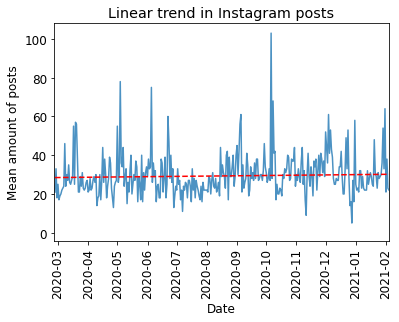

In [40]:
plt.figure(figsize=(6, 4)) 

sns.lineplot(x='datetime',y='count',data= grouped_daily_no_block ,alpha = 0.8)
plt.plot(line_x,model1.predict(xs), color = "r", linestyle = "--")
#plt.legend(title='Blok', loc='upper left', labels=['Rød blok', 'Blå blok'])
plt.ylabel("Mean Number of posts")
plt.xlabel("Date")
plt.title("Linear trend in Instagram posts")
plt.xlim(dstart,dateend)
plt.xticks(rotation = 90)
plt.savefig("plots\\grouped_days_bloc.png",bbox_inches = "tight")

plt.show()

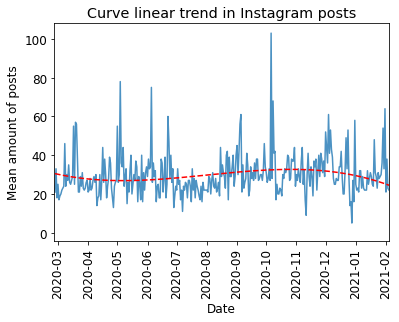

In [41]:
plt.figure(figsize=(6, 4)) 

sns.lineplot(x='datetime',y='count',data= grouped_daily_no_block ,alpha = 0.8)
plt.plot(line_x,model3.predict(xs), color = "r", linestyle = "--")
#plt.legend(title='Blok', loc='upper left', labels=['Rød blok', 'Blå blok'])
plt.ylabel("Mean Number of posts")
plt.xlabel("Date")
plt.title("Curve linear trend in Instagram posts")
plt.xlim(dstart,dateend)
plt.xticks(rotation = 90)
plt.savefig("plots\\grouped_days_bloc_power3.png",bbox_inches = "tight")

plt.show()

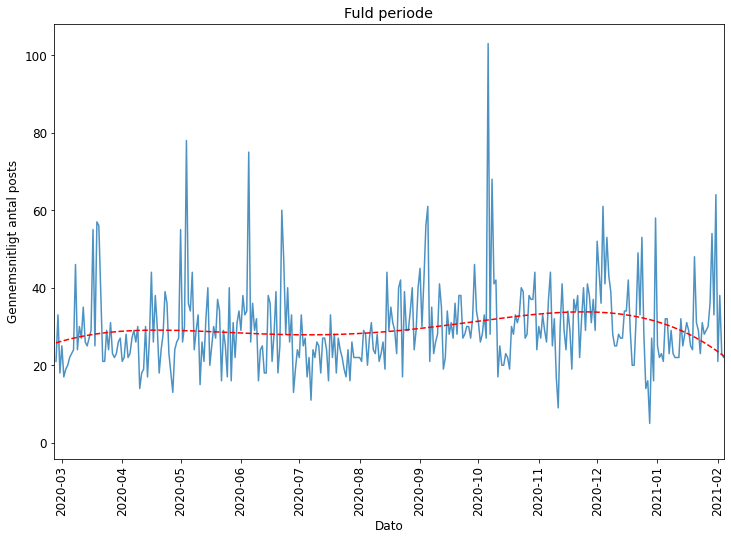

In [42]:
sns.lineplot(x='datetime',y='count',data= grouped_daily_no_block ,alpha = 0.8)
plt.plot(line_x,model4.predict(xs), color = "r", linestyle = "--")
#plt.legend(title='Blok', loc='upper left', labels=['Rød blok', 'Blå blok'])
plt.ylabel("Gennemsnitligt antal posts")
plt.xlabel("Dato")
plt.title("Fuld periode")
plt.xlim(dstart,dateend)
plt.xticks(rotation = 90)
#plt.savefig("plots\\grouped_days_bloc_power4.png",bbox_inches = "tight")

plt.show()

##### ser på perioden rundt om sophie linde dato

In [43]:
l_start = datetime(2020,8,26) - timedelta(days=14)
l_end = datetime(2020,8,26) + timedelta(days=14)

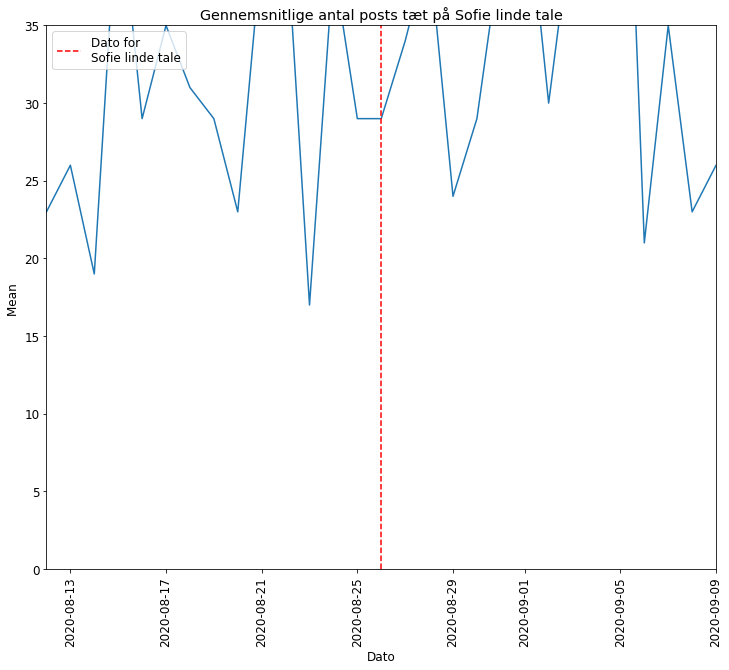

In [44]:
plt.figure(figsize=(12, 10)) 

sns.lineplot(x='datetime',y='count',data= grouped_daily_no_block,ci=None)
#plt.legend(title='Blok', loc='upper left', labels=['Rød blok', 'Blå blok'])
plt.ylabel("Mean ")
plt.xlabel("Dato")
plt.xlim(l_start,l_end)
plt.axvline(x = linde_date, color = 'r', label = 'Dato for \nSofie linde tale', linestyle = "--") 
plt.xticks(rotation = 90)
plt.ylim(0,35)
plt.legend(loc ="upper left")
plt.title("Gennemsnitlige antal posts tæt på Sofie linde tale")
plt.show()

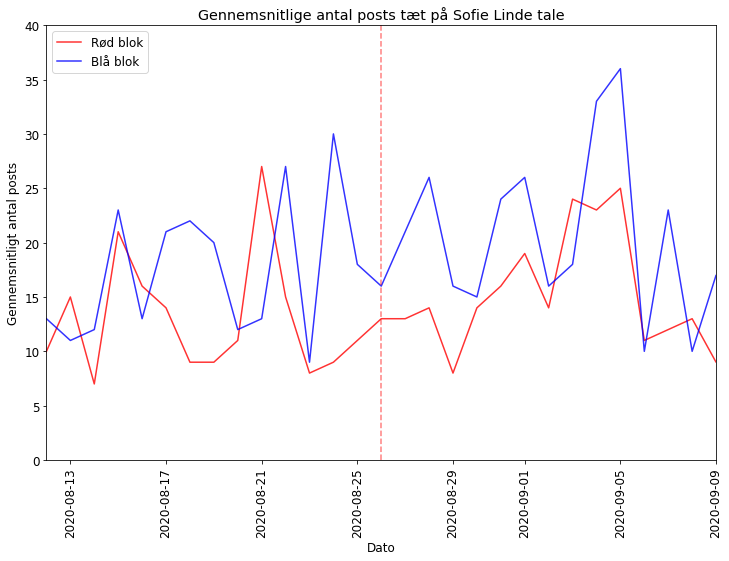

In [45]:
sns.lineplot(x='datetime',y='count',hue = "bloc",data= grouped_daily,ci=None,palette= ["red","blue"],alpha = 0.8)
plt.legend( loc='upper left', labels=['Rød blok', 'Blå blok'])
plt.ylabel("Gennemsnitligt antal posts")
plt.xlabel("Dato")
plt.xlim(l_start,l_end)
plt.axvline(x = linde_date, color = 'r', label = 'Dato for \nSofie linde tale', linestyle = "--", alpha = 0.5) 
plt.xticks(rotation = 90)
#plt.legend(loc ="upper left")
plt.ylim(0,40)
plt.title("Gennemsnitlige antal posts tæt på Sofie Linde tale")
plt.show()

### gruperet på uge


In [46]:
dataset['week'] = [int(float(w)) for w in dataset['week']]

In [47]:
 grouped_weekly_bloc = dataset.groupby(["week","bloc"]).agg({"week": ['count']})['week']

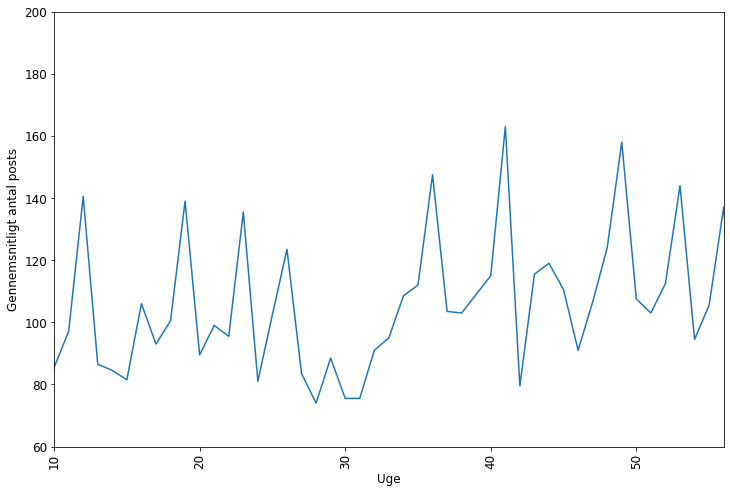

In [48]:
sns.lineplot(x='week',y='count',data= grouped_weekly_bloc,ci=None)

#plt.legend(title='Blok', loc='upper left', labels=['Rød blok', 'Blå blok'])
plt.ylabel("Gennemsnitligt antal posts")
plt.xlabel("Uge")
plt.ylim(60,200)
plt.xlim(10,56)
plt.xticks(rotation = 90)
plt.show()

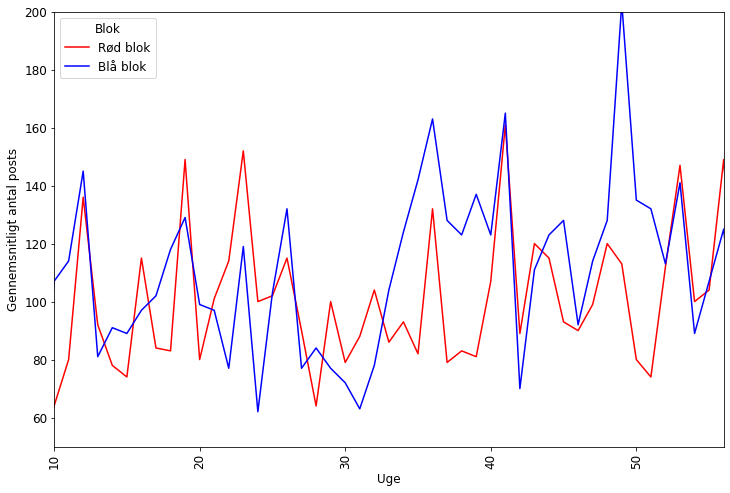

In [49]:
sns.lineplot(x='week',y='count',hue='bloc',data= grouped_weekly_bloc,palette= ["red","blue"])

plt.legend(title='Blok', loc='upper left', labels=['Rød blok', 'Blå blok'])
plt.ylabel("Gennemsnitligt antal posts")
plt.xlabel("Uge")
plt.ylim(50,200)
plt.xlim(10,56)
plt.xticks(rotation = 90)
plt.show()

# Grupperet på måned

In [50]:
 grouped_monthly_bloc = dataset.groupby(["monthyear","bloc"]).agg({"monthyear": ['count']})['monthyear']

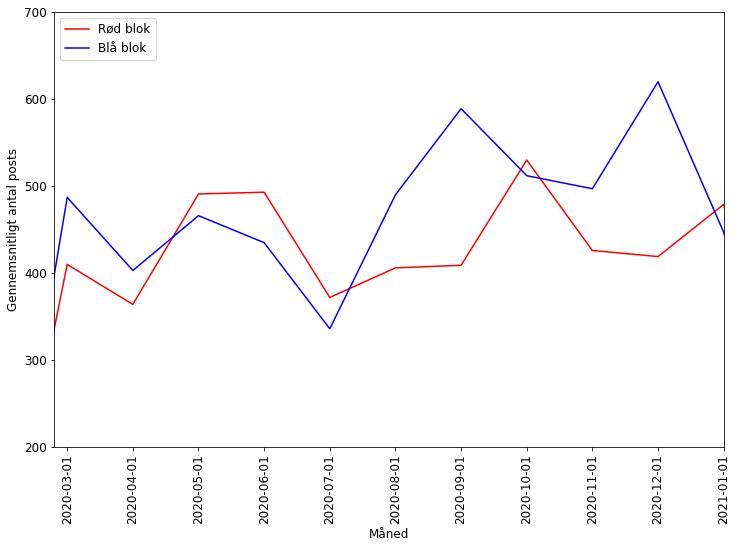

In [51]:
sns.lineplot(x='monthyear',y='count',hue='bloc',data=  grouped_monthly_bloc,palette= ["red","blue"])

plt.legend(loc='upper left', labels=['Rød blok', 'Blå blok'])
plt.ylabel("Gennemsnitligt antal posts")
plt.xlabel("Måned")
plt.ylim(200,700)
plt.xlim(0.8,11)
#plt.xlim(datetime(2020,3,1),datetime(2021,1,1))
plt.xticks(rotation = 90)
plt.show()

## Full period

In [52]:
def ttest_date(dataset, cutoff = datetime.strptime("2020-08-26", "%Y-%m-%d"),metric = "share_women"):
    before =dataset['datetime'] < cutoff
    after = dataset['datetime'] >= cutoff
    
    mean_before =  np.mean(dataset.loc[before,metric])
    mean_after =  np.mean(dataset.loc[after,metric])
    
    print("Mean", metric,"in posts in posts before:", mean_before)
    print("Mean", metric,"in posts in posts after:", mean_after)

    t, p = stats.ttest_ind(dataset.loc[before,metric],dataset.loc[after,metric] , equal_var=False)
    
    print("the t-value is:",t,"\n the p-value is:",p)
    print("the difference in mean is: ",round(mean_after-mean_before,3),"\n It is a change of", round(mean_after-mean_before,5) * 100,"percentage points more/less women")

In [53]:
ttest_date(dataset, metric = "women_binary")

Mean women_binary in posts in posts before: 0.33843706502286736
Mean women_binary in posts in posts after: 0.4013365509560052
the t-value is: -6.662117397455466 
 the p-value is: 2.8355530731190055e-11
the difference in mean is:  0.063 
 It is a change of 6.29 percentage points more/less women


In [54]:
ks, p = stats.ks_2samp(dataset[dataset['treatment'] == 0]['women_binary'],dataset[dataset['treatment'] == 1]['women_binary'])

In [55]:
print("P-value for samlple equality test:",p)

P-value for samlple equality test: 2.153632272516859e-09


### Make plots

In [56]:
mean_women_set = dataset.groupby('date_clean').agg({'women_binary': ['mean','sum']})
mean_women_set = mean_women_set['women_binary'] 

In [57]:
dates = mean_women_set.index
#dates = [datetime.strptime(d, "%Y-%m-%d") for d in list(dates)]
mean_women_set['dates'] = dates
mean_women_set = mean_women_set.reset_index(drop = True)

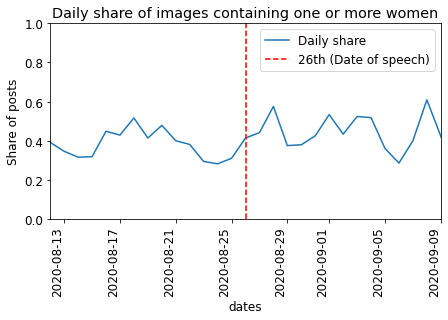

In [58]:
mean_women_set.plot(y = "mean",x = "dates", label = "Daily share",figsize=(7, 4))
plt.ylabel("Share of posts")
plt.xlim(dstart,dateend)
plt.ylim(0,1.5)
plt.xticks(rotation = 90)
plt.title("Daily share of images containing one or more women")
plt.axvline(x = linde_date, color = 'r', label = '26th (Date of speech)', linestyle = "--") 
plt.xlim(linde_date - timedelta(14),linde_date + timedelta(14))
plt.ylim(0,1)
plt.legend()

plt.savefig("plots\\dailyshare_binary_14.png",bbox_inches = "tight")

plt.show()

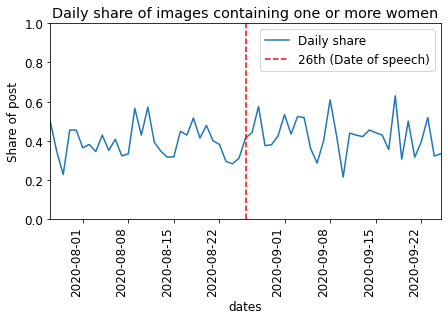

In [59]:
mean_women_set.plot(y = "mean",x = "dates", label = "Daily share",figsize=(7, 4))
plt.xlim(dstart,dateend)
plt.ylabel("Share of post")
plt.ylim(0,1.5)
plt.xticks(rotation = 90)
plt.title("Daily share of images containing one or more women")
plt.axvline(x = linde_date, color = 'r',label = '26th (Date of speech)', linestyle = "--") 
plt.xlim(linde_date - timedelta(30),linde_date + timedelta(30))
plt.ylim(0,1)
plt.legend()

plt.savefig("plots\\dailyshare_binary_30.png",bbox_inches = "tight")

plt.show()

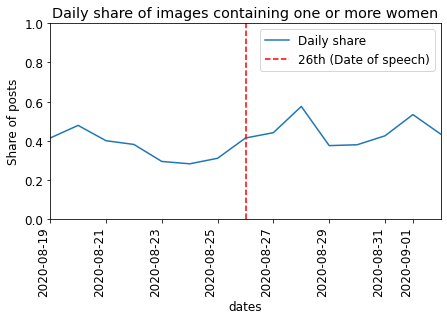

In [60]:
mean_women_set.plot(y = "mean",x = "dates", label = "Daily share",figsize=(7,4))
plt.xlim(dstart,dateend)
plt.ylabel("Share of posts")
plt.ylim(0,1.5)
plt.xticks(rotation = 90)
plt.title("Daily share of images containing one or more women")
plt.axvline(x = linde_date, color = 'r', label = '26th (Date of speech)', linestyle = "--") 
plt.xlim(linde_date - timedelta(7),linde_date + timedelta(7))
plt.ylim(0,1)
plt.legend()

plt.savefig("plots\\dailyshare_binary_7.png",bbox_inches = "tight")

plt.show()

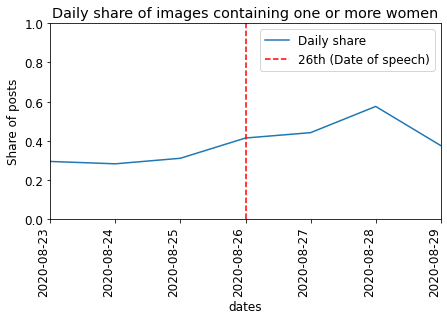

In [61]:
mean_women_set.plot(y = "mean",x = "dates", label = "Daily share",figsize=(7,4))
plt.xlim(dstart,dateend)
plt.ylabel("Share of posts")
plt.ylim(0,1.5)
plt.xticks(rotation = 90)
plt.title("Daily share of images containing one or more women")
plt.axvline(x = linde_date, color = 'r', label = '26th (Date of speech)', linestyle = "--") 
plt.xlim(linde_date - timedelta(3),linde_date + timedelta(3))
plt.ylim(0,1)
plt.legend()

plt.savefig("plots\\dailyshare_binary_3.png",bbox_inches = "tight")


plt.show()

# Test if the samples are roughly equal in terms of y 

- https://towardsdatascience.com/how-to-compare-two-distributions-in-practice-8c676904a285 
- https://docs.scipy.org/doc/scipy/reference/generated/scipy.stats.ks_2samp.html 
- https://en.wikipedia.org/wiki/Kolmogorov%E2%80%93Smirnov_test 
- https://stats.stackexchange.com/questions/354035/how-to-compare-the-data-distribution-of-2-datasets 



# Laver lidt nlp
- https://medium.com/analytics-vidhya/text-preprocessing-for-nlp-natural-language-processing-beginners-to-master-fd82dfecf95
- https://github.com/sorenlind/lemmy

In [62]:
stop_words = set(stopwords.words('danish'))

In [63]:
lemmatizer = lemmy.load("da")

In [64]:
def text_clean(text):
    text = str(text).lower()
    text = nltk.tokenize.word_tokenize(text)
    text = [item for item in text if item not in stop_words]
    text = [lemmatizer.lemmatize("", item)[0] for item in text]
    text = [item for item in text if len(item) > 2]
    text = " ".join(text)
    
    return text

In [65]:
dataset['cleantext'] = dataset['text'].apply(text_clean)

In [66]:
dataset = dataset.reset_index(drop = True)

In [67]:
words = ["enblandtos", "sexis" ,"håndpålår", "ligestilling", "diskrimination", "metoo"]

In [68]:
dataset['topic_metoo'] = [1 if any(x in dataset.loc[i,'cleantext'] for x in words) else 0 for i in range(len(dataset))]

In [69]:
dataset[dataset['topic_metoo'] ==1 ]['share_women'].mean()

0.5152195608782435